# Measuring the Impact of Solar Activity, and Climate on the Price of Wheat and Corn Produced in the United States.

**Team 5**:
Jerald Achaibar, Jonathan Bechtel

# Background:

Our sun has a cyclical nature much like the cold and hot seasons we observe on earth. Solar cycles are measured in the amount of sunspots that appear on the surface of the sun and [span](https://www.nasa.gov/mission_pages/sunearth/solar-events-news/Does-the-Solar-Cycle-Affect-Earths-Climate.html) over 22 years for a full cycle. Half cycles can be observed in 11 years, where it is typical to find a solar maximum. A solar maximum is a period of increased solar activity in the form of the total number of sunspots on the surface of the sun. Sunspots usually occur in pairs and are earth like in size. These massive regions produce abnormal magnetic fields relative to its surroundings. The interference of the magnetic field produced by each spot result in massive explosions that release hot plasma into space. When directed at earth, the magnetic storms are known to widen the visible range of the northern and southern lights, cause radio frequency interference, Satellite/GPS failure, and disruption to power grids.

The effect of solar activity on the earth's climate is still in question. The scientific community is not so sure how much solar activity can or does affect Earth's climate. Previous [research](https://www.weather.gov/fsd/sunspots#:~:text=If%20sunspots%20are%20active%2C%20more,radio%20transmissions%20and%20power%20grids.) shows evidence that the earth's climate is sensitive to minimal changes in the energy output of the sun over time. The ultraviolet radiation is dramatically increased during high sunspot activity times and that is known to have a large effect on the earth's atmosphere.

With concerns about climate change and national/international food security rising, **our team will attempt to explore what impact solar activity and climate may have on the price of agricultural commodities like the price of wheat and corn produced in the United States**. 


Agricultural commodities are notoriously volatile assets and their price fluctuations can have very large impacts on the business decisions of industrial farmers and commodity brokers who traffic in their sales.  Therefore, developing a granular understanding of how different climate systems impact different commodity prices is a pronounced business interest for many firms who take part in the agricultural supply chain.

As we begin to learn more about what impacts crop production and pricing, it's important to understand the harvesting timelines as it stands now. Here's a breakdown below: 

- 
Corn is planted in the spring, April-May and then harvested towards the end of the same year in October-November. 
- Winter wheat is planted at the end of summer/beginning of fall and then harvested in the spring and summer of the following year. 
- 
Spring wheat is planted in April-May and harvested in July-September of the same year. 

These timelines will be key in understanding patterns in crop production and pricing in our data.



# Top level idea:

We will attempt to explore whether solar activity and climate may affect the price of wheat and corn produced in the Mid west United states.

Our initial hypothesis is that these periods of increased solar activity could have a significant impact on crops such as wheat and corn that are produced in the US.

Our original idea was to look at how an overall index of commodities is impacted by climate and weather activity. We found this to be a complex question to attempt to answer as there are many moving parts in a commodity index. Instead, we decided to examine the effects of solar and climate on agricultural crops. This approach gives us a better way to measure the impact of different weather and climate variables since each crop likely has idiosyncratic aspects to its agricultural and commercial sectors, and seeing how they impact each one separately provides for more salient analysis.

In [1]:
#@title
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# Data Overview:

In [2]:
#@title
solar_cycle = pd.read_csv('data/solar_cycle_1.csv', parse_dates=True)
wheat_price = pd.read_csv('data/WheatPrices_annual.csv',parse_dates=True)
corn_price = pd.read_csv('data/CornPrices_annual.csv',parse_dates=True)
solar_cycle0 = pd.read_csv('data/solar_cycle.csv',parse_dates=True)
wheat_weather = pd.read_csv('data/Wheat_weather_daily.csv',parse_dates=True)
corn_weather = pd.read_csv('data/Corn_weather_daily.csv',parse_dates=True)
cycle_lists = pd.read_csv('data/Solar_cycle_list.csv',parse_dates=True)

flux_data =pd.read_csv('data/Flux_data_extended.csv',parse_dates=True)
flux_data.rename(columns={'time':'Date','absolute_f30':'Flux'}, inplace = True)


[Solar Cycle Data](https://www.swpc.noaa.gov/products/solar-cycle-progression) Was obtained from NOAA (National Oceanic and Atmospheric Administration) and contains observed and predicted sunspot numbers and flux (Radiation ommited from the sun) values for previous Solar cycles. The latest cycle ([Solar Cycle 25](https://www.nasa.gov/press-release/solar-cycle-25-is-here-nasa-noaa-scientists-explain-what-that-means/)) is predicted to reach a maximum any time between 2024 and 2026. 


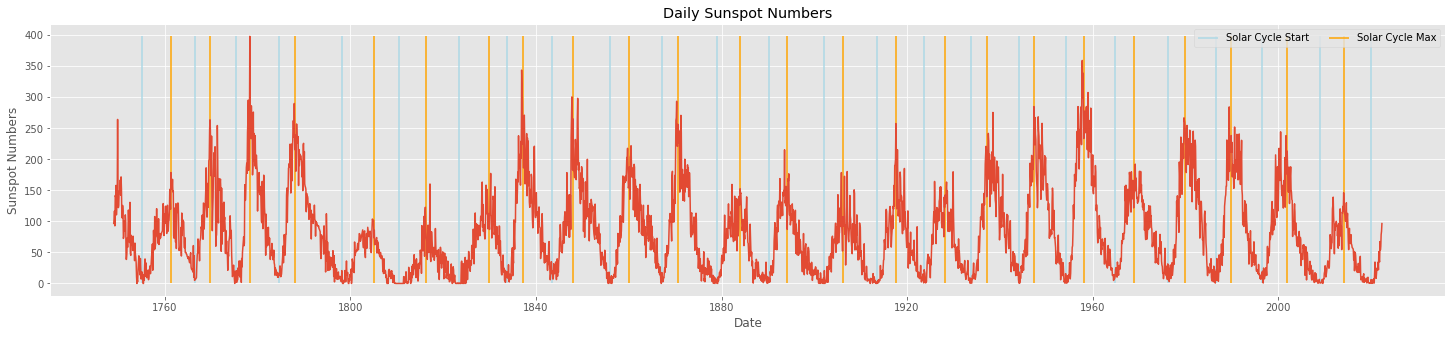

In [3]:
# Solar Cycles 
plt.style.use('ggplot')

# Format dates Correctly 
startDates = pd.to_datetime(cycle_lists[['startYear', 'startMonth']].astype(str).agg('-'.join, axis=1))
maxDates = cycle_lists[['maxYear', 'maxMonth']].copy().dropna()
maxDates.maxYear = maxDates.maxYear.astype(int).astype(str)
maxDates.maxMonth = maxDates.maxMonth.astype(int).astype(str)
maxDates = pd.to_datetime(maxDates.agg('-'.join, axis=1))

solar_cycle.index = pd.to_datetime(solar_cycle.Date)
pdf = solar_cycle[['Date', 'ssn']].copy()
fig, ax = plt.subplots(figsize = (25,5))
ax.plot(pdf.index,pdf.ssn)
ax.vlines(startDates, ymin=0, ymax=max(pdf.ssn), color = 'lightblue', label = 'Solar Cycle Start')
ax.vlines(maxDates, ymin=0, ymax=max(pdf.ssn), color = 'orange', label = 'Solar Cycle Max')
plt.legend(ncol = 2)

ax.set_ylabel('Sunspot Numbers')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Daily Sunspot Numbers')

We notice that sunspot numbers are at their highest point when a solar maximum is achieved. Moreover The begining of solar cycles are when we begin to see sunspots increase aggresivley and are a time period of minimial solar activity. 

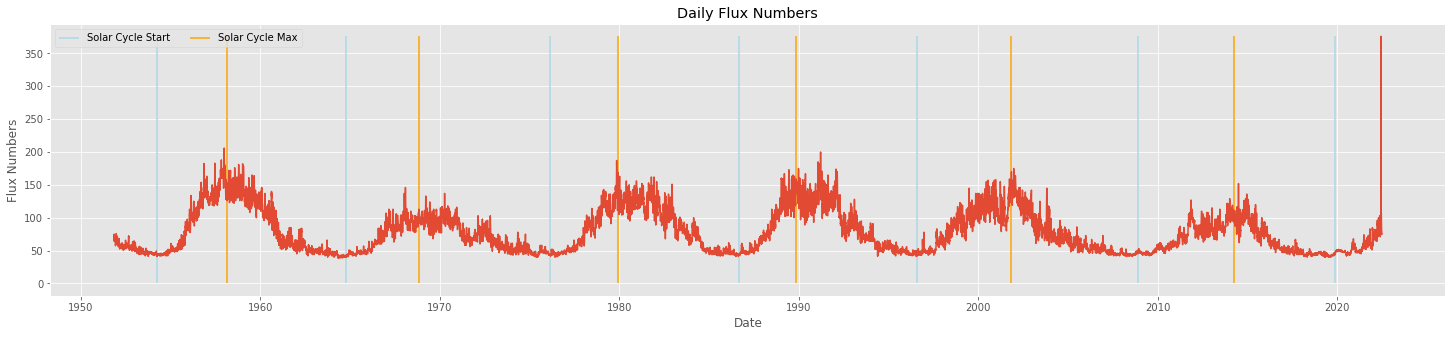

In [4]:
# Flux Values Cycles 
plt.style.use('ggplot')

flux_data.index = pd.to_datetime(flux_data.Date)
pdf = flux_data.copy()
fig, ax = plt.subplots(figsize = (25,5))
ax.plot(pdf.index,pdf.Flux)
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=0, 
            ymax=max(pdf.Flux), color = 'lightblue', label = 'Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=0, ymax=max(pdf.Flux), color = 'orange', label = 'Solar Cycle Max')

plt.legend(ncol = 2)
ax.set_ylabel('Flux Numbers')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Daily Flux Numbers')

Above there is a clear trend with solar cycle maximums and the amount of flux observed from the sun. It Seems pretty indicative of a maximum as we notice that after a solar maximum is achieved the amount of flux goes into a decline. It is also noted that  Solar cycle starts are when these flux values begin to ramp up, in increasing intensity. 

[Wheat](https://www.macrotrends.net/2534/wheat-prices-historical-chart-data) & [Corn](https://www.macrotrends.net/2532/corn-prices-historical-chart-data) Price Data was obtained from `macrotrends.net` and contains the target value of our further analysis (average close). Also included in the dataset is OHLC (Open, High, Low, Close). We notice an upward trend in the price of both wheat and corn; However it's unclear to determine if there is a promininet trend with the Solar Cycle Start and Maximum Dates. 


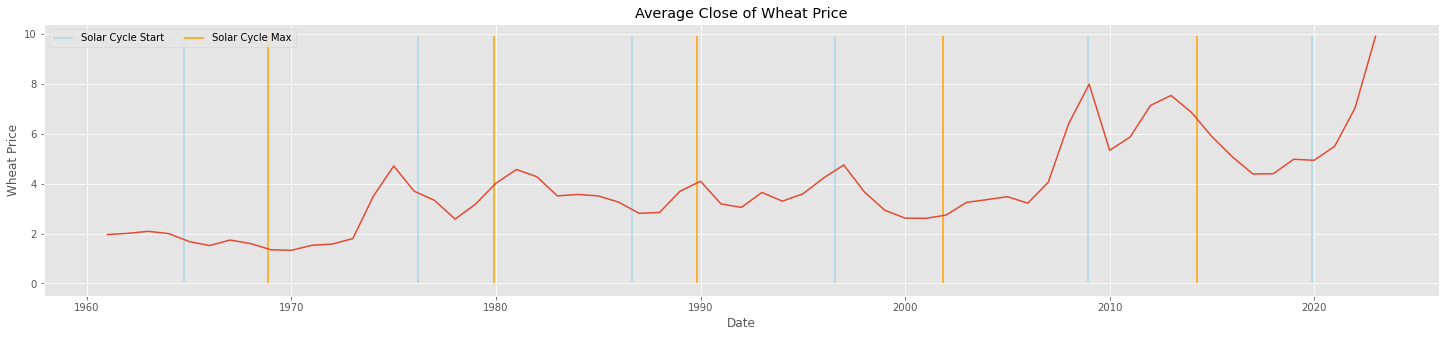

In [5]:
# Wheat Price Vs. Cycles
plt.style.use('ggplot')

wheat_price.index = [pd.to_datetime(str(x) + '-12-31') for x in wheat_price.Year]
pdf = wheat_price.copy()
fig, ax = plt.subplots(figsize = (25,5))
ax.plot(pdf.index,pdf.AvgClose)
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=0, 
            ymax=max(pdf.AvgClose), color = 'lightblue', label = 'Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=0, ymax=max(pdf.AvgClose), color = 'orange', label = 'Solar Cycle Max')
plt.legend(ncol = 2)
ax.set_ylabel('Wheat Price')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Close of Wheat Price')

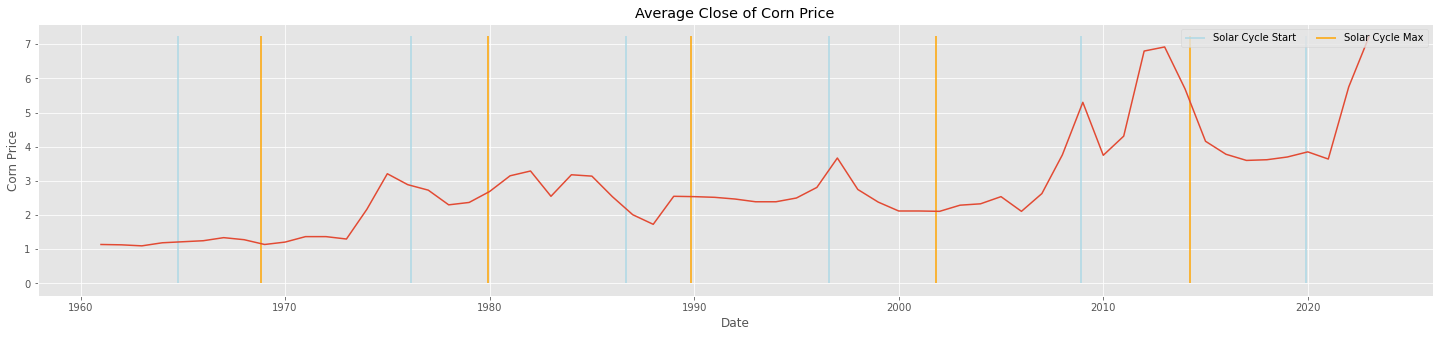

In [6]:
# Flux Values Cycles 
plt.style.use('ggplot')

corn_price.index = [pd.to_datetime(str(x) + '-12-31') for x in corn_price.Year]
pdf = corn_price.copy()
fig, ax = plt.subplots(figsize = (25,5))
ax.plot(pdf.index,pdf.AvgClose)
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=0, 
            ymax=max(pdf.AvgClose), color = 'lightblue', label='Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=0, ymax=max(pdf.AvgClose), color = 'orange', label = 'Solar Cycle Max')
plt.legend(loc="upper right", ncol=2)

ax.set_ylabel('Corn Price')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Close of Corn Price')

Weather data was gathered using the 3 largest statewide producers of wheat and corn in the US. Namely Kansas, North Dakota, and Montana for wheat; and similarly for corn using the states of Iowa, Illinois, Nebraska and Minnesota. Further, to simplify the data, average values of all states were taken to give an overall idea of the climate systems that acclimate wheat/corn production.

> Description of variables in the weather dataframes.

-   `tavg`: The average air temperature in °C

-   `tmin`: The minimum air temperature in °C

-   `tmax`: The maximum air temperature in °C

-   `prcp`: The daily precipitation total in mm

-   `snow`: The maximum snow depth in mm

-   `wdir`: The average wind direction in degrees (°)

-   `wspd`: The average wind speed in km/h

-   `wpgt`: The peak wind gust in km/h

-   `pres`: The average sea-level air pressure in hPa

-   `tsun`: The daily sunshine total in minutes (m)

*Data was gathered from [openweathermaps.org](openweathermaps.org) using the `metostat` package in python.*

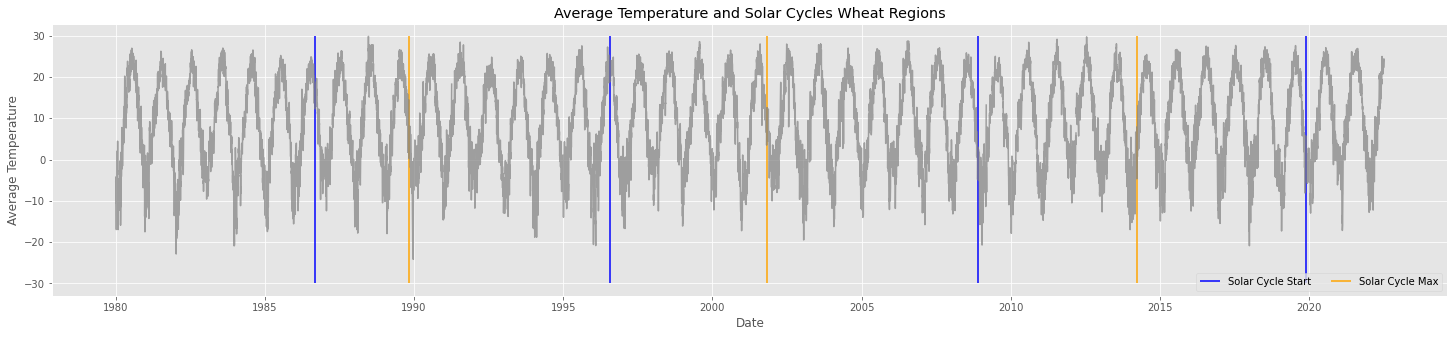

In [7]:
plt.style.use('ggplot')

wheat_weather.index = pd.to_datetime(wheat_weather.time)
pdf = wheat_weather.copy()
fig, ax = plt.subplots(figsize = (25,5))
ax.plot(pdf.index,pdf.tavg, alpha = .7, color = 'grey')
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=-30, 
            ymax=max(pdf.tavg), color = 'blue', label = 'Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=-30, ymax=max(pdf.tavg), color = 'orange', label = 'Solar Cycle Max')

plt.legend(loc="lower right", ncol=2)


ax.set_ylabel('Average Temperature')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Temperature and Solar Cycles Wheat Regions')

We notice that the start of solar cycles in wheat regions were indicative of maximum average temperatures in wheat regions prior to the year 2000. Post 2000 we notice a change where solar cycle start seem to indicate a period of increased average temperatures. Interestingly enough, we notice a similar switch when we observe the solar maximum years. 

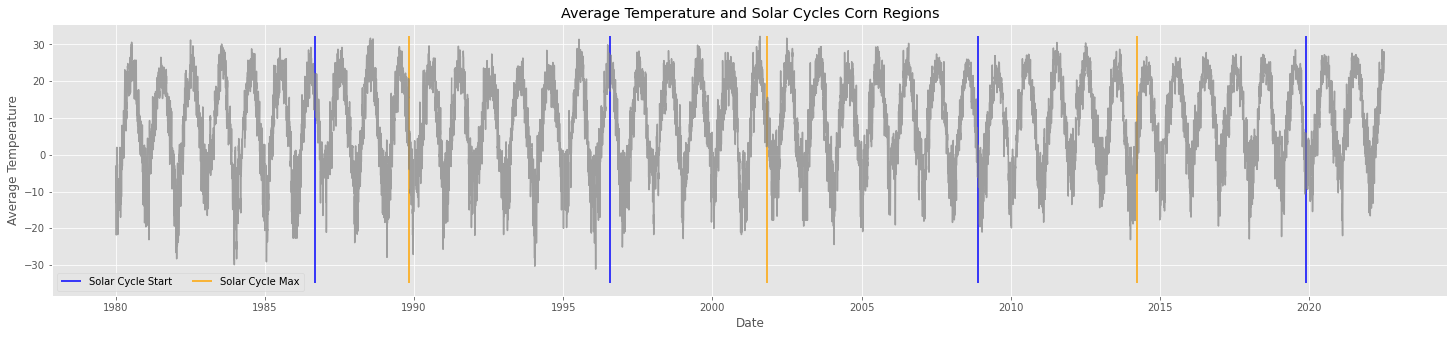

In [8]:
plt.style.use('ggplot')

corn_weather.index = pd.to_datetime(corn_weather.time)
pdf = corn_weather.copy()
fig, ax = plt.subplots(figsize = (25,5))
ax.plot(pdf.index,pdf.tavg, alpha = .7, color = 'grey')
ax.vlines(startDates.where(lambda x : x>=min(pdf.index)).dropna(), ymin=-35, 
            ymax=max(pdf.tavg), color = 'blue', label='Solar Cycle Start')
ax.vlines(maxDates.where(lambda x : x>=min(pdf.index)).dropna(), 
            ymin=-35, ymax=max(pdf.tavg), color = 'orange', label = 'Solar Cycle Max')
plt.legend(loc="lower left", ncol=2)

ax.set_ylabel('Average Temperature')
ax.set_xlabel('Date')
solar_cycle_plot = ax.set_title('Average Temperature and Solar Cycles Corn Regions')

Again, We notice Solar Cycle Starts could indicate a Maximum average temperature recorded in Corn regions as they do prior to the year 2000, and seem to be a sign of a local minimum as they do post year 2000. Unlike the observations in Wheat regions above, it is unclear whether or not solar maximum years indicate an upcoming rise or low in average temperature observed in Corn Regions. 

# EDA 

Combining the dataframes into one. We will be using these dataframes to do some exploratory data analsyis, and to conduct a preliminary linear model to check the relationships between our explanatory variables and the response.

In [9]:
# Annualize Wheat data
annual_solar_cyclce = solar_cycle.drop(columns = ['Date', 'Unnamed: 0']).resample('Y').agg('sum')['ssn']
annual_wheat_weather = wheat_weather.fillna(0).resample('Y').agg('mean').drop(columns = ['lat', 'lng', 'wpgt','tsun'])
wheat_df = annual_wheat_weather.merge(annual_solar_cyclce, left_index=True, right_index=True, how= 'inner')
wheat_df = wheat_df.merge(wheat_price['AvgClose'], left_index=True, right_index=True, how= 'inner')
wheat_df = wheat_df.drop(columns = ['tmin', 'tmax'])
wheat_df.head()

,tavg,prcp,snow,wdir,wspd,pres,ssn,AvgClose
1980-12-31,8.882332,1.741894,9.740437,134.428051,15.114891,1013.864071,2627.7,4.57
1981-12-31,9.268858,2.375982,11.726941,146.484475,13.930502,1013.058174,2385.4,4.28
1982-12-31,7.680000,2.322648,53.757991,158.766667,14.693425,1014.376347,1954.6,3.51
1983-12-31,8.735068,2.184749,12.970776,156.399087,14.480365,1013.411324,1089.5,3.57
1984-12-31,8.610610,2.218124,19.629326,152.298725,13.766211,1013.612067,727.9,3.51


In [10]:
annual_solar_cyclce = solar_cycle.drop(columns = ['Date', 'Unnamed: 0']).resample('Y').agg('sum')['ssn']
annual_corn_weather = corn_weather.fillna(0).resample('Y').agg('mean').drop(columns = ['lat', 'lng', 'wpgt','tsun'])
corn_df = annual_corn_weather.merge(annual_solar_cyclce, left_index=True, right_index=True, how= 'inner')
corn_df = corn_df.merge(corn_price['AvgClose'], left_index=True, right_index=True, how= 'inner')
corn_df = corn_df.drop(columns = ['tmin', 'tmax'])
corn_df.head()

,tavg,prcp,snow,wdir,wspd,pres,ssn,AvgClose
1980-12-31,7.526503,1.512842,19.215847,126.808743,15.548634,1013.920765,2627.7,3.15
1981-12-31,8.135068,1.949589,21.276712,140.816438,16.348219,1010.856164,2385.4,3.29
1982-12-31,7.132329,2.104658,84.408219,129.890411,17.479726,1014.006575,1954.6,2.55
1983-12-31,7.798082,2.721096,81.073973,131.926027,18.118630,1013.597808,1089.5,3.18
1984-12-31,7.454098,2.566940,66.202186,133.081967,18.678962,1013.848634,727.9,3.14


Check correlations: 

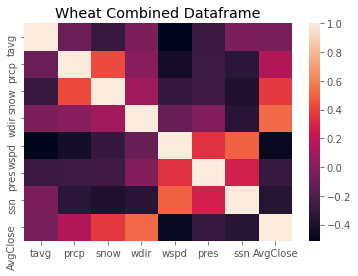

In [11]:
#@title
plt.title('Wheat Combined Dataframe')
Wheatmap = sns.heatmap(wheat_df.corr())

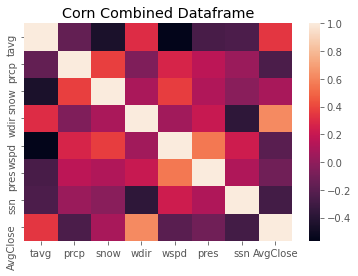

In [12]:
#@title
plt.title('Corn Combined Dataframe')
Cornmap = sns.heatmap(corn_df.corr())

Above we can see the correlation plots for Corn and Wheat. It is observed that there are no signs of servere multicollinearity.

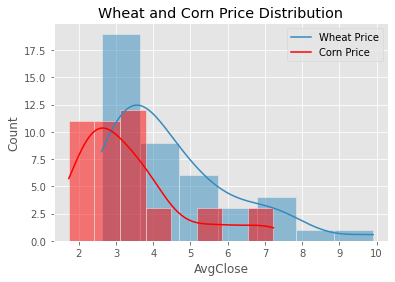

In [13]:
#@title
g = sns.histplot(wheat_df['AvgClose'], kde= True)
g = sns.histplot(corn_df['AvgClose'], kde = True, color = 'red')
gleg = plt.legend(labels=["Wheat Price","Corn Price"])
gtitle = plt.title('Wheat and Corn Price Distribution')

We notice that the distributions for our response variables above are heavily skewed with a long right tail. 

Lets take a deeper look with a time series series decomposition. The `seasonal.decompose` function from the `statsmodels.tsa.seasonal` package should help us acheive this.  The function below, was created to show both additive and multiplicative time series decompositions. 

In [14]:
def ts_analysis(timeSeries, n_periods = 360, show_plots = True, title=None):
    "Return time series decomposition for dataframe. Set Show_plots = False to return data"
    assert n_periods < len(timeSeries), "Number of Periods given is greater than the data given "
    # Additive Decomposition
    additive = seasonal_decompose(timeSeries, model='additive',period= n_periods, extrapolate_trend='freq')
    # Multiplicative Decomposition 
    multiplicative = seasonal_decompose(timeSeries, model='multiplicative',period = n_periods, extrapolate_trend='freq')
    if show_plots != True:
        return additive, multiplicative
    else:
        fig, axes = plt.subplots(4,2, figsize = (15,8))
        axes[0,0].plot(additive.observed, color = 'Black')
        axes[1,0].plot(additive.trend, color = 'orange')
        axes[2,0].plot(additive.seasonal, color = 'green')
        axes[3,0].plot(additive.resid, color = 'red')
        axes[0,1].plot(multiplicative.observed, color = 'Black')
        axes[1,1].plot(multiplicative.trend, color = 'orange')
        axes[2,1].plot(multiplicative.seasonal, color = 'green')
        axes[3,1].plot(multiplicative.resid, color = 'red')

        axes[0,0].set_title("Additive")
        axes[1,0].set_title("Trend")
        axes[2,0].set_title("Seasonality")
        axes[3,0].set_title("Residuals")
        axes[0,1].set_title("Multiplicative")
        axes[1,1].set_title("Trend")
        axes[2,1].set_title("Seasonality")
        axes[3,1].set_title("Residuals")
        if title == None: 
            fig.suptitle('Time Series Decomposition')
        else: 
            fig.suptitle(title, fontsize = 17, fontweight='bold')
        fig.autofmt_xdate()
        plt.tight_layout()
        plt.show()

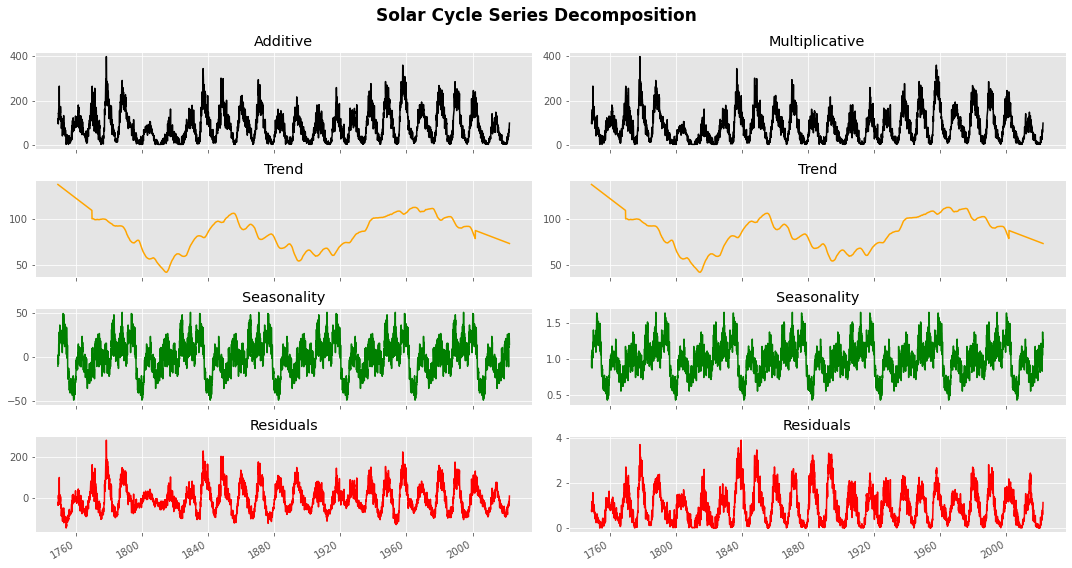

In [15]:
ts_analysis(solar_cycle['ssn']+1, n_periods = 496, title = 'Solar Cycle Series Decomposition')

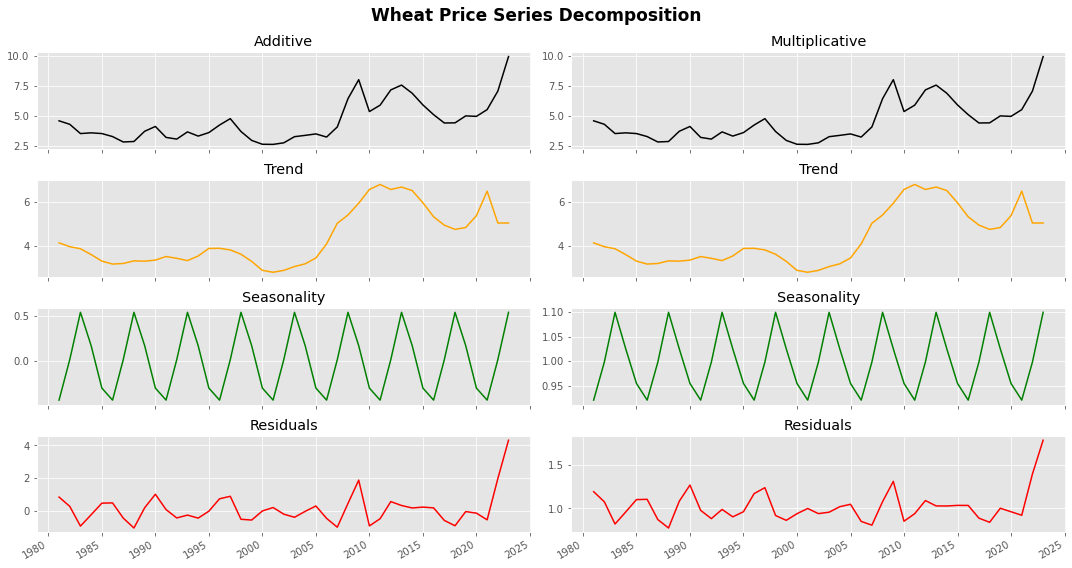

In [16]:
ts_analysis(wheat_df['AvgClose'], n_periods = 5, title = 'Wheat Price Series Decomposition')

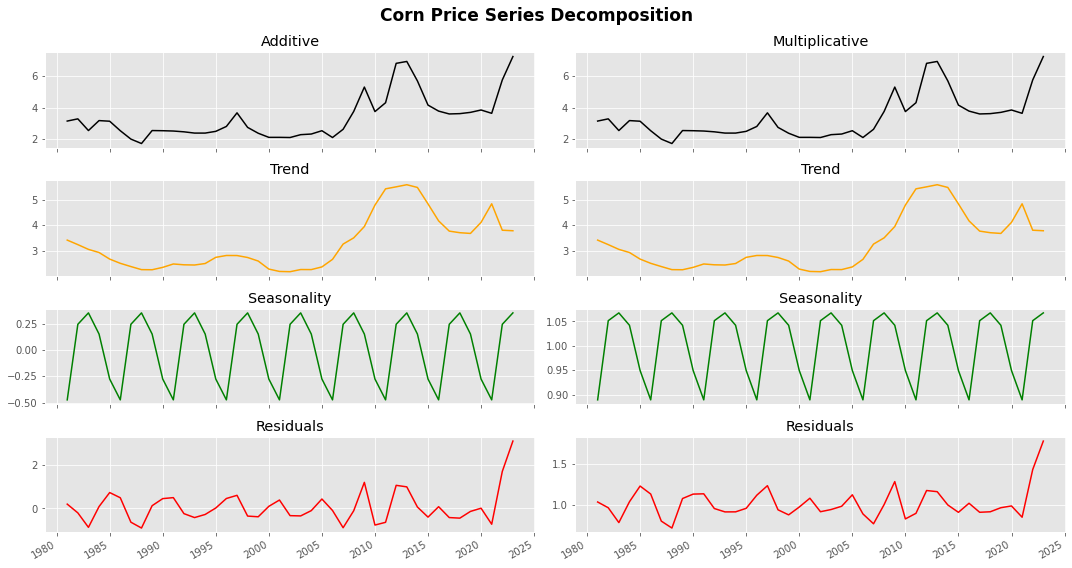

In [17]:
ts_analysis(corn_df['AvgClose'], n_periods = 5, title = 'Corn Price Series Decomposition')

One point we want to make for each of the time series is that the residual component was a significant portion, suggesting there are import exogenuous factors to explain each time series outside of the different time series components themselves.  This suggests there is in fact room for an explanatory factor that looks at additional characteristics beyond just autogregression to explain the observed prices for each crop.

# Our Approach: 

**Analyzing the Impact of Weather and Climate on Corn & Wheat Prices**

With our initial exploratory data analysis completed, we'll now turn to trying to study the impact of various climate variables on closing prices on both the annual and quarterly level.  

Our rationale for looking at prices at two different frequencies is based on the fact that both corn and wheat have seasonal harvesting periods that typically occur between June & October of each year.  So quarterly data might provide granular insight into climatological impacts that annual data might not.  

Likewise, it's possible that annual data will provide a high level overview about the general impact of climate and crop price.  So we'll study both and compare the two.  

Our approach to studying this problem is rooted in both descriptive and predictive analytics.  For the descriptive part, we choose linear regression since the combination of coefficient values and t-stats give us a useful way of quantifying both the direction and magnitude of different predictors in the dataset.  

For the predictive aspect, we use Gradient Boosting, which is a technique that has proven to be highly accurate on tabular data.  After fitting our Gradient Boosting model we'll use its feature importance to compare with the output of linear regression to see if there are commonalities between the two.  Presumably, predictors that are deemed important by both models suggest that the factors are durable and important since they were relevant using different learning techniques.

In [18]:
#@title
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import plotly.express as px
pd.options.plotting.backend = "plotly"
import os

In [19]:
#@title
# load in data
import pandas as pd
cwd      = pd.read_csv('data/Corn_weather_daily.csv', parse_dates = ['time'])
cpa      = pd.read_csv('data/CornPrices_annual.csv')
cities   = pd.read_csv('data/crop_cities.csv')
flux     = pd.read_csv('data/Flux_data_extended.csv')
rflux    = pd.read_csv('data/radioFlux.csv', parse_dates = ['Date'])
scy      = pd.read_csv('data/solar_cycle.csv', parse_dates = ['time-tag'])
scy1     = pd.read_csv('data/solar_cycle_1.csv')
scylist  = pd.read_csv('data/Solar_cycle_list.csv')
sweather = pd.read_csv('data/space_weather.csv')
sun      = pd.read_csv('data/sunSpot.csv')
wwd      = pd.read_csv('data/Wheat_weather_daily.csv', parse_dates = ['time'])
wpa      = pd.read_csv('data/WheatPrices_annual.csv')

# convert to a datetime column
flux['time'] = pd.to_datetime(flux['time'])

## Data Preparation

One challenge we face with this problem is that our data is collected at different frequencies.  Data for sunspots, solar flux, and corn is collected daily, while our data for corn and wheat prices are at the annual level, which means for model inputs we'll need to aggregate everything at the appropriate frequency.  

The following code creates quarterly aggregations for each weather variable so we can see the data for `Q1`, `Q2`, `Q3`, and `Q4` as independent variables to compare to average annual closing price for both wheat and corn.

In [20]:
# quarterly results for different metrics
cwd_q   = cwd.resample('Q', on = 'time').agg(['mean', 'std'])
wwd_q   = wwd.resample('Q', on = 'time').agg(['mean', 'std'])
flux_q  = flux.resample('Q', on = 'time').agg(['mean', 'std'])
sun_q   = scy.resample('Q', on = 'time-tag')['ssn'].mean()

# dataframe of results for corn
q_results = {
    'Year'   : [],
    'Temp-q1': [],
    'Temp-q2': [],
    'Temp-q3': [],
    'Temp-q4': [],
    'Prcp-q1': [],
    'Prcp-q2': [],
    'Prcp-q3': [],
    'Prcp-q4': [],
    'Wspd-q1': [],
    'Wspd-q2': [],
    'Wspd-q3': [],
    'Wspd-q4': [],
    'Wspd-std-q1': [],
    'Wspd-std-q2': [],
    'Wspd-std-q3': [],
    'Wspd-std-q4': [],
    'Flux-q1': [],
    'Flux-q2': [],
    'Flux-q3': [],
    'Flux-q4': [],
    'Sun-q1':  [],
    'Sun-q2':  [],
    'Sun-q3':  [],
    'Sun-q4':  []
}

# and for wheat
wq_results = {
    'Year'   : [],
    'Temp-q1': [],
    'Temp-q2': [],
    'Temp-q3': [],
    'Temp-q4': [],
    'Prcp-q1': [],
    'Prcp-q2': [],
    'Prcp-q3': [],
    'Prcp-q4': [],
    'Wspd-q1': [],
    'Wspd-q2': [],
    'Wspd-q3': [],
    'Wspd-q4': [],
    'Wspd-std-q1': [],
    'Wspd-std-q2': [],
    'Wspd-std-q3': [],
    'Wspd-std-q4': [],
    'Flux-q1': [],
    'Flux-q2': [],
    'Flux-q3': [],
    'Flux-q4': [],
    'Sun-q1':  [],
    'Sun-q2':  [],
    'Sun-q3':  [],
    'Sun-q4':  []    
}

cur_year = 1979

# fill in values for the weather data
for idx in cwd_q.index:

    if idx.year != cur_year:
        q_results['Year'].append(idx.year)
        wq_results['Year'].append(idx.year)
        cur_year = idx.year
    if idx.quarter == 1:
        q_results['Temp-q1'].append(cwd_q.loc[idx]['tavg']['mean'])
        q_results['Prcp-q1'].append(cwd_q.loc[idx]['prcp']['mean'])
        q_results['Wspd-q1'].append(cwd_q.loc[idx]['wspd']['mean'])
        q_results['Wspd-std-q1'].append(cwd_q.loc[idx]['wspd']['std'])
        q_results['Flux-q1'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        q_results['Sun-q1'].append(sun_q.loc[idx])
        
        wq_results['Temp-q1'].append(wwd_q.loc[idx]['tavg']['mean'])
        wq_results['Prcp-q1'].append(wwd_q.loc[idx]['prcp']['mean'])
        wq_results['Wspd-q1'].append(wwd_q.loc[idx]['wspd']['mean'])
        wq_results['Wspd-std-q1'].append(wwd_q.loc[idx]['wspd']['std'])
        wq_results['Flux-q1'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        wq_results['Sun-q1'].append(sun_q.loc[idx])
        
    elif idx.quarter == 2:
        q_results['Temp-q2'].append(cwd_q.loc[idx]['tavg']['mean'])
        q_results['Prcp-q2'].append(cwd_q.loc[idx]['prcp']['mean'])  
        q_results['Wspd-q2'].append(cwd_q.loc[idx]['wspd']['mean'])
        q_results['Wspd-std-q2'].append(cwd_q.loc[idx]['wspd']['std'])
        q_results['Flux-q2'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        q_results['Sun-q2'].append(sun_q.loc[idx])
        
        wq_results['Temp-q2'].append(wwd_q.loc[idx]['tavg']['mean'])
        wq_results['Prcp-q2'].append(wwd_q.loc[idx]['prcp']['mean'])
        wq_results['Wspd-q2'].append(wwd_q.loc[idx]['wspd']['mean'])
        wq_results['Wspd-std-q2'].append(wwd_q.loc[idx]['wspd']['std'])
        wq_results['Flux-q2'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        wq_results['Sun-q2'].append(sun_q.loc[idx])

    elif idx.quarter == 3:
        q_results['Temp-q3'].append(cwd_q.loc[idx]['tavg']['mean'])
        q_results['Prcp-q3'].append(cwd_q.loc[idx]['prcp']['mean']) 
        q_results['Wspd-q3'].append(cwd_q.loc[idx]['wspd']['mean'])
        q_results['Wspd-std-q3'].append(cwd_q.loc[idx]['wspd']['std'])
        q_results['Flux-q3'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        
        wq_results['Temp-q3'].append(wwd_q.loc[idx]['tavg']['mean'])
        wq_results['Prcp-q3'].append(wwd_q.loc[idx]['prcp']['mean'])
        wq_results['Wspd-q3'].append(wwd_q.loc[idx]['wspd']['mean'])
        wq_results['Wspd-std-q3'].append(wwd_q.loc[idx]['wspd']['std'])
        wq_results['Flux-q3'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        try:
            q_results['Sun-q3'].append(sun_q.loc[idx])
            wq_results['Sun-q3'].append(sun_q.loc[idx])
        except:
            continue

    elif idx.quarter == 4:
        q_results['Temp-q4'].append(cwd_q.loc[idx]['tavg']['mean'])
        q_results['Prcp-q4'].append(cwd_q.loc[idx]['prcp']['mean']) 
        q_results['Wspd-q4'].append(cwd_q.loc[idx]['wspd']['mean'])
        q_results['Wspd-std-q4'].append(cwd_q.loc[idx]['wspd']['std'])
        q_results['Flux-q4'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        q_results['Sun-q4'].append(sun_q.loc[idx])
        
        wq_results['Temp-q4'].append(wwd_q.loc[idx]['tavg']['mean'])
        wq_results['Prcp-q4'].append(wwd_q.loc[idx]['prcp']['mean'])
        wq_results['Wspd-q4'].append(wwd_q.loc[idx]['wspd']['mean'])
        wq_results['Wspd-std-q4'].append(wwd_q.loc[idx]['wspd']['std'])
        wq_results['Flux-q4'].append(flux_q.loc[idx]['absolute_f30']['mean'])
        wq_results['Sun-q4'].append(sun_q.loc[idx])
        
# backfill the previously missing values
q_results['Temp-q4'].append(q_results['Temp-q4'][-1])
q_results['Prcp-q4'].append(q_results['Prcp-q4'][-1])
q_results['Wspd-q4'].append(q_results['Wspd-q4'][-1])
q_results['Wspd-std-q4'].append(q_results['Wspd-std-q4'][-1])
q_results['Flux-q4'].append(q_results['Flux-q4'][-1])
q_results['Sun-q4'].append(q_results['Sun-q4'][-1])
q_results['Sun-q3'].append(q_results['Sun-q3'][-1])

wq_results['Temp-q4'].append(q_results['Temp-q4'][-1])
wq_results['Prcp-q4'].append(q_results['Prcp-q4'][-1])
wq_results['Wspd-q4'].append(q_results['Wspd-q4'][-1])
wq_results['Wspd-std-q4'].append(q_results['Wspd-std-q4'][-1])
wq_results['Flux-q4'].append(q_results['Flux-q4'][-1])
wq_results['Sun-q4'].append(q_results['Sun-q4'][-1])
wq_results['Sun-q3'].append(q_results['Sun-q3'][-1])
     
q_results = pd.DataFrame(q_results)
wq_results = pd.DataFrame(wq_results)

# complete final dataset
q_results = q_results.merge(cpa, on = 'Year', how = 'left')
wq_results = wq_results.merge(cpa, on = 'Year', how = 'left')

### Annual Data Prep

The following code block does something similar, but for annual statistics for both weather and climate.

In [21]:
# first with basic raw values:  both wheat and corn
cwd_annual      = cwd.resample('Y',  on = 'time').agg(['max', 'min', 'mean', 'std'])
wwd_annual      = wwd.resample('Y',  on = 'time').agg(['mean', 'std'])
flux_annual     = flux.resample('Y', on = 'time').agg(['max', 'min', 'mean', 'std'])
sun_annual      = scy.resample('Y',  on = 'time-tag')[['ssn']].mean()

# fill in data for corn
acd             = pd.DataFrame()
acd['avg_temp'] = cwd_annual['tavg']['mean']
acd['std_temp'] = cwd_annual['tavg']['std']
acd['avg_prcp'] = cwd_annual['prcp']['mean']
acd['std_prcp'] = cwd_annual['prcp']['std']
acd['avg_snow'] = cwd_annual['snow']['mean']
acd['avg_tsun'] = cwd_annual['tsun']['mean']
acd['avg_pres'] = cwd_annual['tsun']['mean']
acd['avg_wspd'] = cwd_annual['wspd']['mean']
acd['avg_wdir'] = cwd_annual['wdir']['mean']
acd['avg_flux'] = flux_annual['absolute_f30']['mean']
acd['avg_sun']  = sun_annual['ssn']
acd['Year']     = cwd_annual.index.year

# treat missing values -- assuming missing values means it didn't happen
acd['avg_tsun'] = acd['avg_tsun'].fillna(0)
acd['avg_pres'] = acd['avg_pres'].fillna(0)

# fill in data for wheat
awd             = pd.DataFrame()
awd['avg_temp'] = wwd_annual['tavg']['mean']
awd['std_temp'] = wwd_annual['tavg']['std']
awd['avg_prcp'] = wwd_annual['prcp']['mean']
awd['std_prcp'] = wwd_annual['prcp']['std']
awd['avg_snow'] = wwd_annual['snow']['mean']
awd['avg_tsun'] = wwd_annual['tsun']['mean']
awd['avg_pres'] = wwd_annual['tsun']['mean']
awd['avg_wspd'] = wwd_annual['wspd']['mean']
awd['avg_wdir'] = wwd_annual['wdir']['mean']
awd['avg_flux'] = flux_annual['absolute_f30']['mean']
awd['avg_sun']  = sun_annual['ssn']
awd['Year']     = wwd_annual.index.year

# treat missing values -- assuming missing values means it didn't happen
awd['avg_tsun'] = awd['avg_tsun'].fillna(0)
awd['avg_pres'] = awd['avg_pres'].fillna(0)

# create the final dataset
acd = acd.merge(cpa, on = 'Year', how = 'left')
awd = awd.merge(cpa, on = 'Year', how = 'left')

## Regressions to Determine Relevance - Corn

We'll start by looking at annual data for corn to try and determine if there are any high level relationships between different values and the closing price.  We're also going to include a column for the current year to determine if relationships are just due to the passing of time.

In [22]:
#@title
# OLS with yearly data - only windspeed is close to being relevant -- sun and flux don't seem to matter
X = acd.iloc[:, :12]
y = acd['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     3.288
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00441
Time:                        13:12:02   Log-Likelihood:                -57.659
No. Observations:                  43   AIC:                             139.3
Df Residuals:                      31   BIC:                             160.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -162.4867     78.464     -2.071      0.0

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


As we can see above, the only relevant predictor is year, which suggests that at an annualized frequency, weather and climate values do not impact closing prices for corn at all.  In fact, we'll rerun the same regression with just `Year` as a predictor and we'll see that the adjusted r-squared is virtually the same, meaning that once you account for the passage of time no other predictor has any notable relevance.

In [23]:
#@title
# refit with just year -- almost the exact same results with all of the other variables included
X = acd[['Year']]
y = acd['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     24.48
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.33e-05
Time:                        13:12:02   Log-Likelihood:                -64.218
No. Observations:                  43   AIC:                             132.4
Df Residuals:                      41   BIC:                             136.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -130.8615     27.131     -4.823      0.0

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We'll next regress against quarterly data to see if there are any differences.  And as you can see from the table below, we do see higher adjusted r-squared values, as well as statistically significant t-stats for weather variables in the 2nd and third quarters.  We'll try and build on these results by only looking at data from quarters 2 and 3 to see how much of our results depend on data from those two quarters.

In [24]:
X = q_results.iloc[:, :25]
y = q_results['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     3.421
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00559
Time:                        13:12:02   Log-Likelihood:                -35.649
No. Observations:                  43   AIC:                             123.3
Df Residuals:                      17   BIC:                             169.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         130.8150    102.082      1.281      

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We'll try and build on these results by only looking at data from quarters 2 and 3 to see how much of our results depend on data from those two quarters.

In [25]:
# code for quarterly data -- predicting the average close most are relevant, time does not matter
# almost every weather metric is relevant in either the second or third quarter
X = q_results.loc[:, ['Year', 'Prcp-q2', 'Prcp-q3', 'Wspd-q2', 'Wspd-q3', 
                      'Wspd-std-q2', 'Wspd-std-q3', 'Flux-q2', 'Flux-q3', 'Sun-q2', 'Sun-q3']]
y = q_results['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     9.033
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           6.17e-07
Time:                        13:12:02   Log-Likelihood:                -43.401
No. Observations:                  43   AIC:                             110.8
Df Residuals:                      31   BIC:                             131.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          89.4617     64.394      1.389      

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


As you can see with the above results, our results are almost the same, but with much more robust results since a larger proportion of predictors have statistically significant t-stats.  Looking at the above table, windspeed is notably important, with a positive impact in quarter 2, but a negative impact in quarter 3.  The direction of these variables can be explained by the fact that the growing season is in quarter two, but the harvesting season is in quarter 3. 

Presumably high wind speeds in quarter two result in extra pollination, but perhaps damage crops when they're being removed from the ground.

To get a more parsimonious model, we'll only include the predictors that had relevant t-stats.  And as we see below, the results are almost unchanged, suggesting that the combination of wind, precipation, and solar and flux activity have the most enduring impacts.  It's also worth noting that the relevance of the `year` column is insignificant when you account for these metrics, suggesting we're capturing effects that are more than just the passage of time.

In [26]:
# if you redo results with just time, precipitation, windspeed, sun and flux in q3
X = q_results.loc[:, ['Year', 'Wspd-q2', 'Wspd-q3', 'Prcp-q3', 'Sun-q3', 'Flux-q3']]
y = q_results['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     11.11
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           5.45e-07
Time:                        13:12:02   Log-Likelihood:                -51.752
No. Observations:                  43   AIC:                             117.5
Df Residuals:                      36   BIC:                             129.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3295     55.019      0.133      0.8

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We'll wrap up our analysis of corn by looking at how the most relevant predictors persist into the future.  To do this we'll shift the target variable up by one year, so that way we're regressing the windspeed, precipiation, solar and sunspot activity of the current year against the closing prices of corn for the following year.  

Of note is that sunspot activity is highly predictive, but other values are not.  This is likely due to the fact that sunspot activity is highly cyclical, so a lot in one year is suggestive that there will be much less in the other, allowing for there to be a significant negative correlation between the two vales.

In [27]:
# if you redo results with just time, precipitation, windspeed, sun and flux in q3
X = q_results.loc[1:, ['Year', 'Wspd-q2', 'Wspd-q3', 'Prcp-q3', 'Sun-q3', 'Flux-q3']]
y = q_results['AvgClose'].shift()[1:]
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     10.07
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.84e-06
Time:                        13:12:02   Log-Likelihood:                -47.517
No. Observations:                  42   AIC:                             109.0
Df Residuals:                      35   BIC:                             121.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3524     54.409      0.650      0.5

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


However, if we regress two years into the future we can see that no values are significant, suggesting there's no future persistence two years into the future.

In [28]:
# no longer valid two years into the future
X = q_results.loc[2:, ['Year', 'Prcp-q3', 'Wspd-q2', 'Wspd-q3', 'Flux-q3', 'Sun-q3']]
y = q_results['AvgClose'].shift(2)[2:]
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     3.847
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00492
Time:                        13:12:02   Log-Likelihood:                -54.707
No. Observations:                  41   AIC:                             123.4
Df Residuals:                      34   BIC:                             135.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -43.2252     67.623     -0.639      0.5

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Regression Analysis -- Wheat

We'll continue a similar analysis for wheat prices.  The steps we are going to take will be the same, so we'll provide less annotation and simply summarize the results, with additional commentary when needed.

We start with annual values, and like corn find that very little is significant, except for precipation.

In [29]:
# OLS with yearly data - very noisy, only wind direction and std precipitation seem to matter
X = awd.iloc[:, :12]
y = awd['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4.525
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           0.000432
Time:                        13:12:02   Log-Likelihood:                -53.691
No. Observations:                  43   AIC:                             131.4
Df Residuals:                      31   BIC:                             152.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -93.0956     60.828     -1.530      0.1

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


If we look at quarterly data we again see that quarter 3 is highly significant, likely due to the timing of its growing season.

In [30]:
# will now look at quarterly data -- including all variables -- q3 seems to be most important
X = wq_results.iloc[:, :25]
y = wq_results['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     3.462
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00524
Time:                        13:12:02   Log-Likelihood:                -35.438
No. Observations:                  43   AIC:                             122.9
Df Residuals:                      17   BIC:                             168.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          60.4438     78.970      0.765      

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


If we only include values from quarter 3 we get a more parsimonious model with an r-squared value that's almost the same as the full model, suggesting these factors are the most relevant for the target.

In [31]:
# redo, with just q3 data
X = wq_results.loc[:, ['Wspd-std-q3', 'Flux-q3', 'Sun-q3', 'Wspd-q3', 'Prcp-q3', 'Temp-q3', 'Year']]
y = wq_results['AvgClose']
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     7.036
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           2.96e-05
Time:                        13:12:02   Log-Likelihood:                -55.396
No. Observations:                  43   AIC:                             126.8
Df Residuals:                      35   BIC:                             140.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.5136     52.357      0.411      

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


If we take the most import predictors from the previous step and use them to predict one year into the future, we find that many factors actually become *more* important.  This is likely due to the fact that wheat is stored longer before sale than corn, so it's feasible that today's wheat prices are due to last year's agricultural conditions.

In [32]:
# predict one year into the future -- rsquare value went up!
X = wq_results.loc[1:, ['Flux-q3', 'Sun-q3', 'Wspd-q3', 'Temp-q3', 'Year']]
y = wq_results['AvgClose'].shift()[1:]
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     13.03
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           2.88e-07
Time:                        13:12:02   Log-Likelihood:                -46.880
No. Observations:                  42   AIC:                             105.8
Df Residuals:                      36   BIC:                             116.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7060     41.862      0.351      0.7

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


If we move our analysis two years into the future, flux and sunspot activity are still relevant, but windspeed and temperature are not.  The negative sign for sunspot activity is consistent with what we saw for wheat.

In [33]:
# two years into the future -- sun & flux are still relevant
X = wq_results.loc[2:, ['Flux-q3', 'Sun-q3', 'Wspd-q3', 'Temp-q3', 'Year']]
y = wq_results['AvgClose'].shift(2)[2:]
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     5.238
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00108
Time:                        13:12:02   Log-Likelihood:                -53.878
No. Observations:                  41   AIC:                             119.8
Df Residuals:                      35   BIC:                             130.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.9179     52.614     -0.816      0.4

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


However, three years into the future nothing at all has relevance, suggesting this is a cutoff at which point these values have no impact.

In [34]:
# three years into the future -- nothing is relevant
X = wq_results.loc[3:, ['Flux-q3', 'Sun-q3', 'Wspd-q3', 'Temp-q3', 'Year']]
y = wq_results['AvgClose'].shift(3)[3:]
X = sm.add_constant(X)

mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               AvgClose   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.257
Date:                Sun, 07 Aug 2022   Prob (F-statistic):             0.0165
Time:                        13:12:03   Log-Likelihood:                -56.338
No. Observations:                  40   AIC:                             124.7
Df Residuals:                      34   BIC:                             134.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -94.1098     58.569     -1.607      0.1

/Users/jerald/miniforge3/envs/dsenv/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Gradient Boosting

We'll now build off of some of the results from previous sections, to see if we can use quarterly data with tree based models to try and estimate wheat and corn prices, using some of the findings from the previous section.  Mainly, that data from the third quarter seems to be most relevant for estimating weather impacts on the price.

We'll use gradient boosting, since it's generally been established as the most powerful predictive model for tabular data among the tree based family of statistical models.  We'll use this to compare with our results from linear regression, and see if we can perhaps improve on our previous results.  

We attempt to do this to see if a different learning technique finds different patterns, and compare feature importance between the models to see if there are similarities between the two models.

### Gradient Boosting Intro

Gradient Boosting is an additive modeling technique that takes the following form:

$$f(x) = \sum_{m=1}^Mf_m(x); f_m(x) = \sum_{m=1}^{M-1} + f_m(x)$$

That is, the prediction of the final model is the summation of each prediction from $M$ different boosting rounds.

The base learners in the model are typically shallow decision trees with a max depth between two and six trees.  

Each model is fit on the negative gradient of the problem's loss function, which is interpreted as being the 'direction of improvement' for each sample.  

At each round each sample is updated by the value of its negative gradient, scaled by a parameter value known as $\alpha$, which is in the interval $[0, 1]$.

One issue to note with Gradient Boosting is that since it is open ended and has a potentially infinite number of model parameters, overfitting on training data is very easy to do.  

To counter this we'll do a parameter search using a Grid Search, where we'll iteratively select different model parameters for the amount of boosting rounds, tree depth, and learning rate.  Each set of parameters will then be put through 10 fold cross validation, and the model parameters that provide the best out of sample accuracy will be used as the final model.  

We'll then compare results and feature importances for quarterly data for both corn and wheat to see how they compare with our original linear model.

In [35]:
def build_and_fit_model(mod, X, y, params):
    print("Getting ready to do a parameter search for best parameters")
    grid = GridSearchCV(mod, params, cv = 10, scoring = 'neg_mean_squared_error')
    grid.fit(X, y)
    print("Finished.")
    mod.set_params(**grid.best_params_)
    mod.fit(X, y)
    score = mod.score(X, y)
    importances = pd.DataFrame({
    'Col': X.columns,
    'Imp': mod.feature_importances_
    }).sort_values(by = 'Imp', ascending = False)
    return score, grid.best_params_, importances

We'll begin by looking at quarterly data from quarters 2 and 3 for corn below.

In [36]:
# function for corn data with quarterly metrics
mod = GradientBoostingRegressor()
params = {
    'n_estimators':  [10, 20, 50, 100],
    'learning_rate': [.01, .05, .1, .2],
    'max_depth': [2, 3, 4],
    'max_features': [.4, .5, .6, .7]
}


# quarterly data for corn
X = q_results.loc[:, ['Prcp-q2', 'Prcp-q3', 'Wspd-q2', 'Wspd-q3', 
                      'Wspd-std-q2', 'Wspd-std-q3', 'Flux-q2', 'Flux-q3', 'Sun-q2', 'Sun-q3']]
y = q_results['AvgClose']

score, b_params, feats = build_and_fit_model(mod, X, y, params)

Getting ready to do a parameter search for best parameters
Finished.


As we can see, final model scores were significantly higher, and like linear regression, wind speed was the most relevant predictive factor.

In [37]:
#@title
# model score
print(f"""model score: {score}, boosting rounds: {b_params['n_estimators']}, learning rate: {b_params['learning_rate']} tree depth: {b_params['max_depth']}""")

model score: 0.8389935133264989, boosting rounds: 20, learning rate: 0.05 tree depth: 4


In [38]:
# and model importances -- windspeed and precipiation dominate
feats

,Col,Imp
3,Wspd-q3,0.296316
5,Wspd-std-q3,0.234318
1,Prcp-q3,0.120755
2,Wspd-q2,0.097596
4,Wspd-std-q2,0.066378
0,Prcp-q2,0.045757
8,Sun-q2,0.043261
7,Flux-q3,0.035894
6,Flux-q2,0.031664
9,Sun-q3,0.028061


We'll do similar results for wheat to see how they work.

In [39]:
# quarterly data for corn
X = wq_results.loc[:, ['Prcp-q2', 'Prcp-q3', 'Wspd-q2', 'Wspd-q3', 
                      'Wspd-std-q2', 'Wspd-std-q3', 'Flux-q2', 'Flux-q3', 'Sun-q2', 'Sun-q3']]
y = wq_results['AvgClose']

score, b_params, feats = build_and_fit_model(mod, X, y, params)

Getting ready to do a parameter search for best parameters
Finished.


In [40]:
print(f"""model score: {score}, boosting rounds: {b_params['n_estimators']}, learning rate: {b_params['learning_rate']} tree depth: {b_params['max_depth']}""")

model score: 0.6117911189255315, boosting rounds: 20, learning rate: 0.05 tree depth: 2


In [41]:
# and model importances -- windspeed is most relevant
feats

,Col,Imp
3,Wspd-q3,0.340376
2,Wspd-q2,0.254201
5,Wspd-std-q3,0.176904
8,Sun-q2,0.089814
9,Sun-q3,0.047108
7,Flux-q3,0.039391
4,Wspd-std-q2,0.023291
6,Flux-q2,0.018710
0,Prcp-q2,0.010204
1,Prcp-q3,0.000000


For this model we have largely similar results.  Higher r-squared values compared to linear models, and a large feature importance allocated to windspeed compared to other variables.  

The importance of windspeed is not unique among the different models, but the magnitude is.  The Gradient Boosting Machine detects it as by far the most import metric compared to others, and provides a less pluralistic picture of contributing factors than linear regression does.

In total, these results both confirm and somewhat contradict the results from the previous session.  Windspeed was consistently important across all models, but the GBM determined that extraterrestrial climate factors like solar flux and sun spots to be almost entirely irrelevant.  

Gradient Boosted models has significantly higher r-squared values, but with smaller datasets it is almost trivially easy to overfit training data, even if using robust model selection techniques.

# Findings and Conclusions

Weather characteristics from the third quarter are the only relevant predictors of corn and wheat prices.  

Solar flux and sunspot activity does not have a large impact for the current year, but does have a persistent impact 1-2 years after the events are recorded.

Tree based models return feature importances that are in line with the main results from linear regression.

The most important predictors of corn and wheat prices have a persistence 1-2 years into the future, but are irrelevant three years into the future.  Suggesting that a current growing season will have a persistent impact on commodity prices up to two years after the events are recorded.


**Regression Summaries: Annual Vs Quarterly**

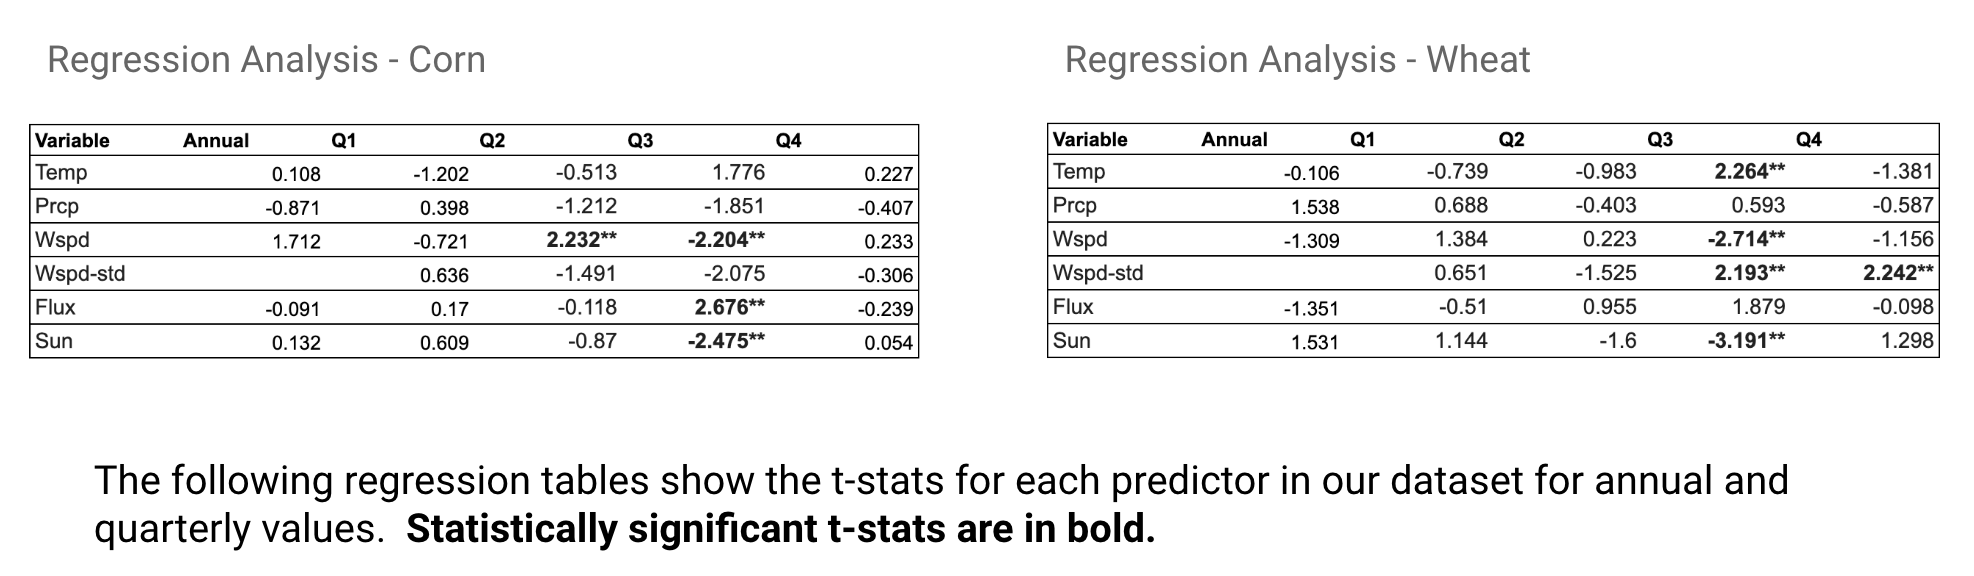

**Regression Summaries: Present Vs Future**

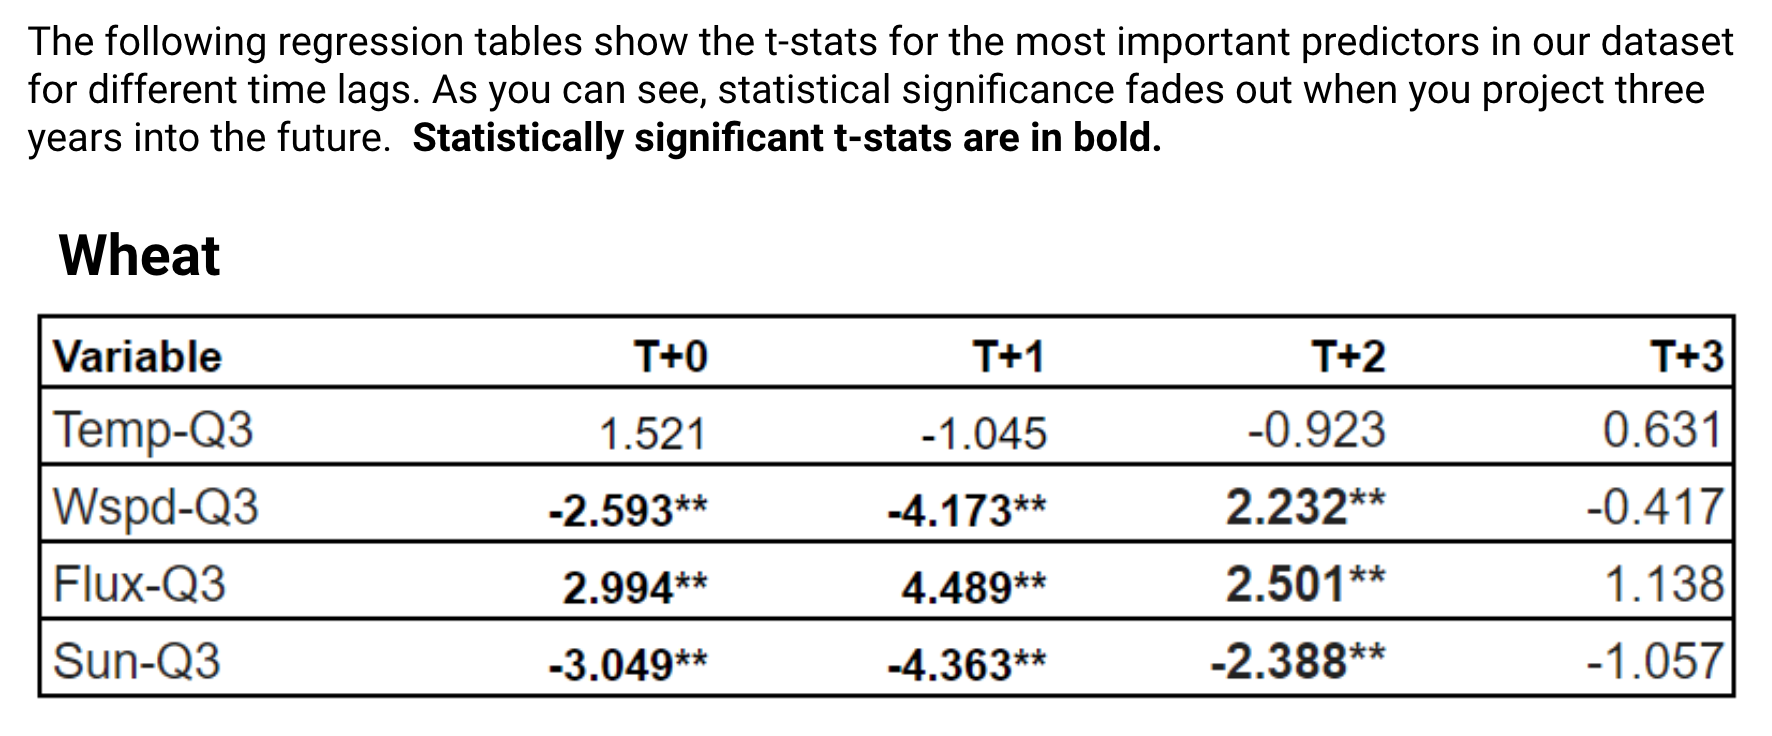

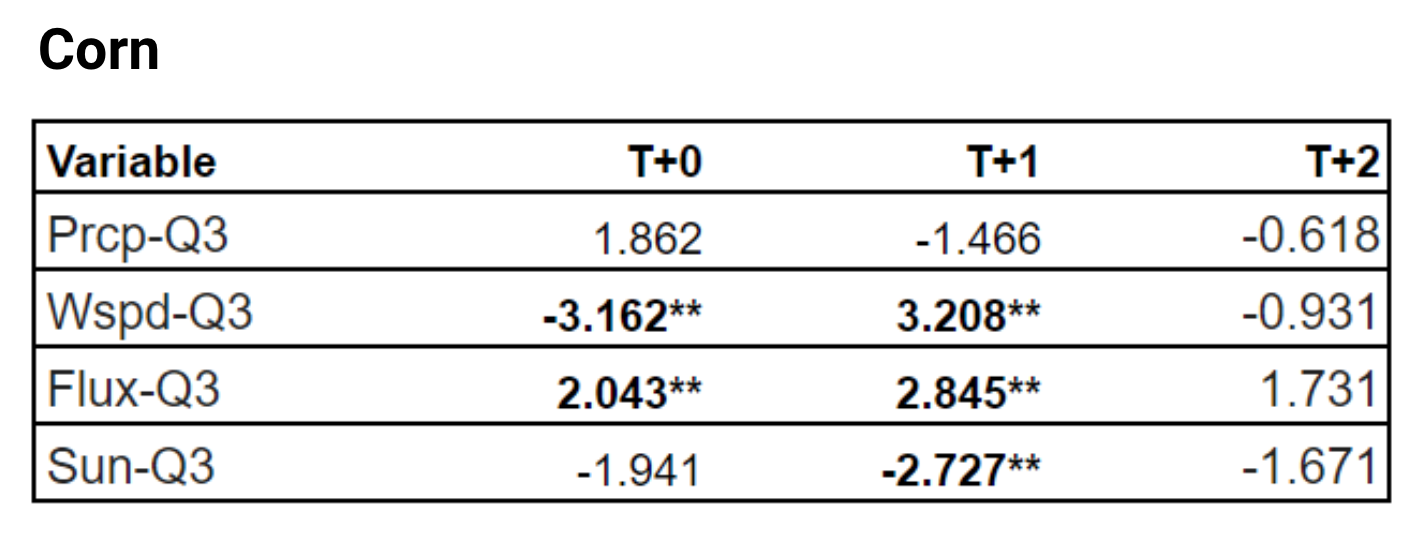

**Feature Importances: Gradient Boosting**

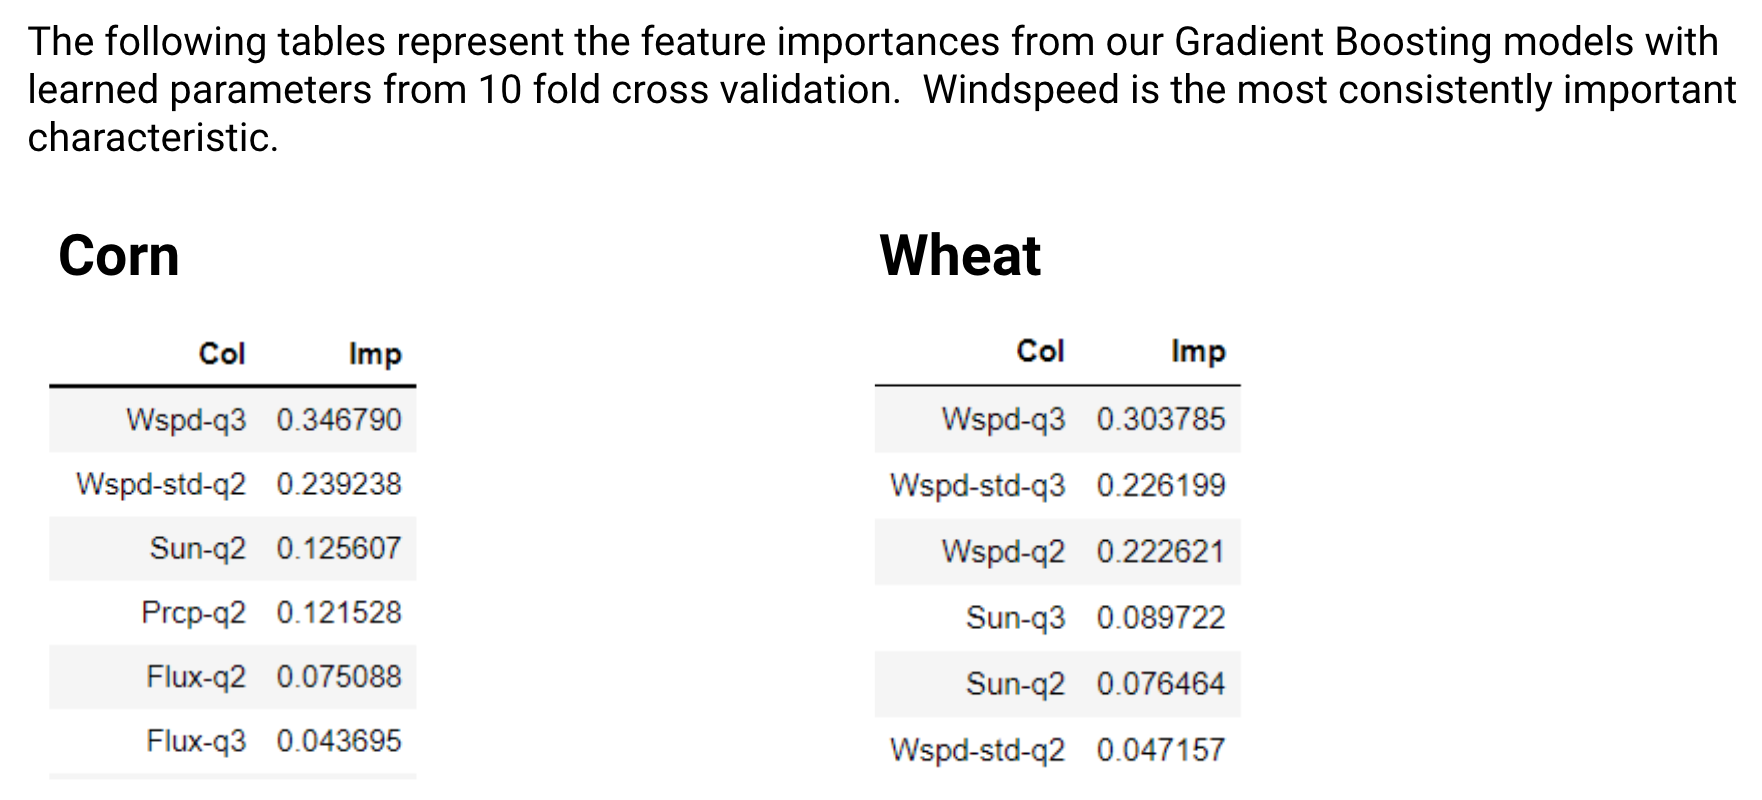

**Results and Conclusions**

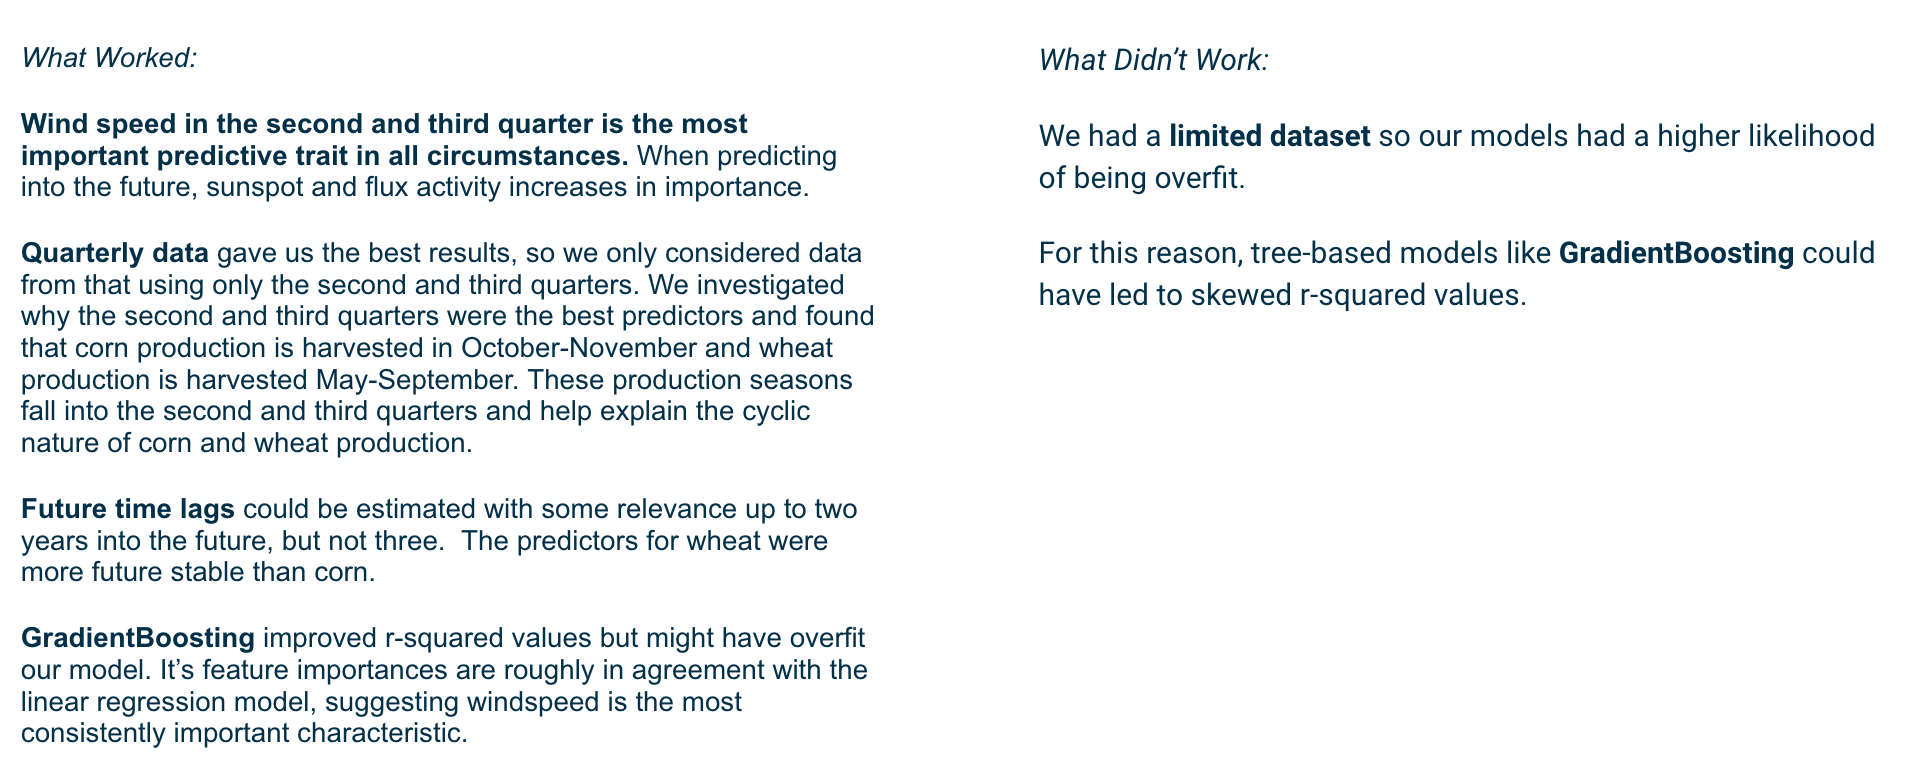

# Sources

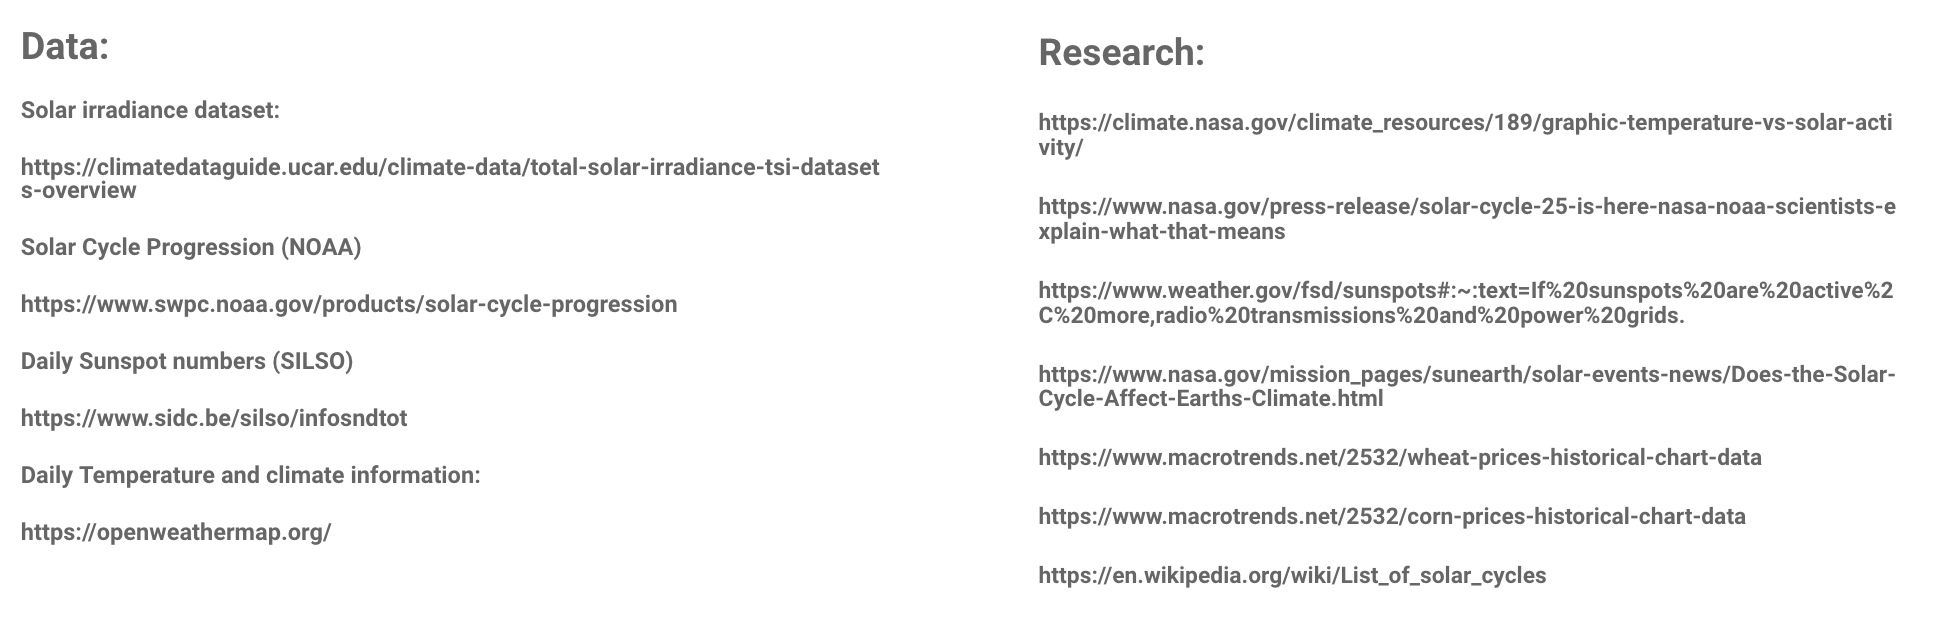

End of Report. 